# Sequentials Models

Embeddings -> Palavras semelhantes (Agrupamentos de palavras em formatos de vetores)

Para entender o significado semântico das palavras não basta apenas observar os vetores de palavras mas também se faz necessário observar a ordem de colocação, por tanto, as RNN (LSTM) podem nos auxiliar nesses tipos de tarefas.

LSTM - Long Short Term Memory é uma variação de uma Rede Neural Recorrente (RNN) que é muito utilizada em problemas envolvendo linguagem natural, pois essas redes neurais permitindo que as informações passadas anteriormente se adequem à mensagem que é passada para o seu sucessor, assim não há perda de informação.

A LSTM é bem adequada para classificar, processar e prever séries temporais com intervalos de tempo de duração desconhecida.

# 0.0 Imports

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import re
import io

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

## 0.1 loading Data

In [4]:
imdb = pd.read_csv(r'D:\Cursos_DS\NLP_coursera\Data\IMDB_reviews\IMDB Dataset.csv' )

# 1.0 Data Visualization

In [5]:
# Tamanho do Dataset
len(imdb)

50000

## 1.1 Data Types

In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
imdb['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# 2.0 Data Preparation

## 2.1 Apply function

In [8]:
# Remove as tags de HTML
def _remove_tags_html(text):
    text = re.sub('<[^<]+?>', '', str(text))
    return text


# Remove e-mail
def _remove_email(text):
    text = ' '.join([w for w in text.split() if '@' not in w])
    return text

# Remove os Emojis
def _remove_emoji(string):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def _sub_char_especial_normal(text):
    # Substitui caracteres especiais por letras com acentos

    # Letra minúsculas
    text = re.sub(r"&aacute;", "á", text)
    text = re.sub(r"&atilde;", "ã", text)
    text = re.sub(r"&agrave;", "à", text)
    text = re.sub(r"&acirc;", "â", text)
    text = re.sub(r"&aring;", "a", text)
    text = re.sub(r"&auml;", "a", text)
    text = re.sub(r"&aelig;", "ae", text)
    text = re.sub(r"&eacute;", "é", text)
    text = re.sub(r"&ecirc;", "ê", text)
    text = re.sub(r"&egrave;", "è", text)
    text = re.sub(r"&euml;", "e", text)
    text = re.sub(r"&iacute;", "í", text)
    text = re.sub(r"&icirc;", "î", text)
    text = re.sub(r"&iuml;", "i", text)
    text = re.sub(r"&oacute;", "ó", text)
    text = re.sub(r"&otilde;", "õ", text)
    text = re.sub(r"&ocirc;", "ô", text)
    text = re.sub(r"&ograve;", "ò", text)
    text = re.sub(r"&uacute;", "ú", text)
    text = re.sub(r"&ucirc;", "û", text)
    text = re.sub(r"&ugrave;", "ù", text)
    text = re.sub(r"&uuml;", "u", text)
    text = re.sub(r"&ccedil;", "ç", text)
    text = re.sub(r"&ntilde;", "não", text)

    # Letras maiúsculas
    text = re.sub(r"&Aacute;", "Á", text)
    text = re.sub(r"&Atilde;","Ã", text) # Letra maiúscula
    text = re.sub(r"&Agrave;", "À", text)
    text = re.sub(r"&Acirc;", "Â", text)
    text = re.sub(r"&Aring;", "A", text)
    text = re.sub(r"&Auml;", "A", text)
    text = re.sub(r"&Aelig;", "AE", text)
    text = re.sub(r"&Eacute;", "É", text)
    text = re.sub(r"&Ecirc;", "Ê", text)
    text = re.sub(r"&Egrave;", "È", text)
    text = re.sub(r"&Euml;", "E", text)
    text = re.sub(r"&Iacute;", "Í", text)
    text = re.sub(r"&Icirc;", "Î", text)
    text = re.sub(r"&Iuml;", "I", text)
    text = re.sub(r"&Oacute;", "Ó", text)
    text = re.sub(r"&Otilde;", "Õ", text)
    text = re.sub(r"&Ocirc;", "Ô", text)
    text = re.sub(r"&Ograve;", "Ò", text)
    text = re.sub(r"&Uacute;", "Ú", text)
    text = re.sub(r"&Ucirc;", "Û", text)
    text = re.sub(r"&Ugrave;", "Ù", text)
    text = re.sub(r"&Uuml;", "U", text)
    text = re.sub(r"&Ccedil;", "Ç", text)
    text = re.sub(r"&Ntilde;", "Não", text)
    text = re.sub(r"&Yacute;", "Y", text)

    #any special char to be replaced
    text = re.sub(r"&lt;", "<", text)
    text = re.sub(r"&gt;", ">", text)
    text = re.sub(r"&amp;", "&", text)
    text = re.sub(r"&reg;", "&", text) 
    text = re.sub(r"&copy;", "&", text) 
    text = re.sub(r"&quot;","'", text)
    text = re.sub(r"&lsquo;","'", text)
    text = re.sub(r"&rsquo;","'", text)
    return text

# Termos em code HTML
def _remove_char_html(text):
    text = re.sub(r"&ndash;","", text)
    text = re.sub(r"&ordf;","", text)
    text = re.sub(r"&nbsp;","", text)
    text = re.sub(r"&cent;","", text)
    text = re.sub(r"&pound;","", text)
    text = re.sub(r"&sect;","", text)
    text = re.sub(r"&copy;","", text)
    text = re.sub(r"&laquo;","", text)
    text = re.sub(r"&raquo;","", text)
    text = re.sub(r"&reg;","", text)
    text = re.sub(r"&deg;","", text)
    text = re.sub(r"&plusmn;","", text)
    text = re.sub(r"&para;","", text)
    text = re.sub(r"&middot;","", text)
    text = re.sub(r"&frac12;","", text)
    text = re.sub(r"&mdash;","", text)
    text = re.sub(r"&lsquo;","", text)
    text = re.sub(r"&rsquo;","", text)
    text = re.sub(r"&sbquo;","", text)
    text = re.sub(r"&ldquo;","", text)
    text = re.sub(r"&rdquo;","", text)
    text = re.sub(r"&bdquo;","", text)
    text = re.sub(r"&dagger;","", text)
    text = re.sub(r"&Dagger;","", text)
    text = re.sub(r"&bull;","", text)
    text = re.sub(r"&hellip;","", text)
    text = re.sub(r"&prime;","", text)
    text = re.sub(r"&Prime;","", text)
    text = re.sub(r"&euro;","", text)
    text = re.sub(r"&trade;","", text)
    text = re.sub(r"&asymp;","", text)
    text = re.sub(r"&ne;","", text)
    text = re.sub(r"&le;","", text)
    text = re.sub(r"&ge;","", text)
    text = re.sub(r"&lt;","", text)
    text = re.sub(r"&gt;","", text)
    return text

In [9]:
def transform_text(text):
    text = _remove_tags_html(text)
    text = _remove_email(text)
    text = _remove_emoji(text)
    text = _sub_char_especial_normal(text)
    text = _remove_char_html(text)
    return text

In [10]:
# Aplicando a transformação nas reviews
imdb['review']=imdb['review'].apply(str)
imdb['review_transform'] = imdb['review'].apply(transform_text)

## 2.2 Map labels

In [11]:
dictionary = {  'positive':1,
                'negative':0}

imdb['sentiment_num'] = imdb['sentiment'].map(dictionary)

In [12]:
imdb.head()

,review,sentiment,review_transform,sentiment_num
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",1


## 2.3 Train and test

In [13]:
train_data = imdb[['review_transform','sentiment_num']].iloc[:25000]
test_data = imdb[['review_transform','sentiment_num']].iloc[25000:]

In [14]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for l in train_data['sentiment_num']:
    training_labels.append(l)
for s in train_data['review_transform']:
    training_sentences.append(str(s))

for l in test_data['sentiment_num']:
    testing_labels.append(l)
for s in test_data['review_transform']:
    testing_sentences.append(str(s))


In [15]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

# 3.0 Preprocessing

## 3.1 Configuration

In [16]:
vocab_size = 10000
embeding_dim = 16
max_lenght = 1000
trunc_type = 'post'
oov_tok = 'XXXXXX'

## 3.2 Tokenization

In [17]:
tokenizer = Tokenizer(  num_words=vocab_size,
                        oov_token= oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences( sequences, 
                        maxlen=max_lenght,
                        truncating = trunc_type)

In [18]:
# Tokens do vocabulário no exame de teste.
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences( testing_sequences,
                                maxlen = max_lenght)

# 4.0 Model - Rede Neural

## 4.1 Buid Model LSTM

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embeding_dim, input_length = max_lenght), # Aqui é onde a magia realmente acontece
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), #Ensure that return_sequences is set to True only on units that feed to another LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

In [50]:
model.compile(  loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [51]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 16)          160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 1000, 128)        41472     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 246,913
Trainable params: 246,913
Non-tr

### 4.1.2 Model fit

In [52]:
num_epochs = 10


In [53]:
history = model.fit(  padded,
            training_labels_final,
            epochs = num_epochs,
            validation_data = (testing_padded, testing_labels_final))

Epoch 1/10


KeyboardInterrupt: 

### 4.1.3 Results

In [45]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [46]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

NameError: name 'plt' is not defined

## 4.1 Construindo rede neural - Model_1

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embeding_dim, input_length = max_lenght), # Aqui é onde a magia realmente acontece
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

In [55]:
model.compile(  loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [56]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 16)          160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 996, 128)          10368     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 24)                3096      
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
________________________________________________

### 4.1.2 Model fit

In [57]:
num_epochs = 10


In [58]:
history = model.fit(  padded,
            training_labels_final,
            epochs = num_epochs,
            validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 78s 98ms/step - loss: 0.4283 - accuracy: 0.7813 - val_loss: 0.2815 - val_accuracy: 0.8834
Epoch 2/10
782/782 [==============================] - 73s 93ms/step - loss: 0.2176 - accuracy: 0.9145 - val_loss: 0.2603 - val_accuracy: 0.8934
Epoch 3/10
782/782 [==============================] - 72s 92ms/step - loss: 0.1227 - accuracy: 0.9577 - val_loss: 0.2959 - val_accuracy: 0.8893
Epoch 4/10
782/782 [==============================] - 70s 90ms/step - loss: 0.0566 - accuracy: 0.9830 - val_loss: 0.3557 - val_accuracy: 0.8885
Epoch 5/10
782/782 [==============================] - 66s 84ms/step - loss: 0.0208 - accuracy: 0.9954 - val_loss: 0.4111 - val_accuracy: 0.8876
Epoch 6/10
782/782 [==============================] - 70s 90ms/step - loss: 0.0061 - accuracy: 0.9993 - val_loss: 0.4805 - val_accuracy: 0.8848
Epoch 7/10
782/782 [==============================] - 75s 96ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5256 - val_accuracy:

### 4.1.3 Results

In [59]:
def plot_graphs(history, string, title):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.title(title)
    plt.legend([string, 'val_'+string])
    plt.show()

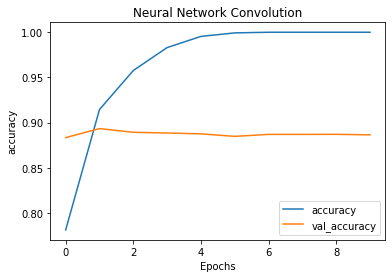

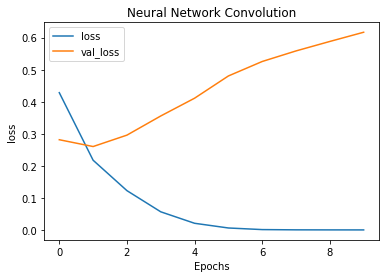

In [60]:
plot_graphs(history, 'accuracy', 'Neural Network Convolution')
plot_graphs(history, 'loss', 'Neural Network Convolution')

# 5.0 Model Save

In [61]:
model.save(r'.\models\test_week_3.h5')